# The Python code is created to allow Professor to run all the required codes to obtain the results in one place

This Python notebook contains following components - 


1) Raw Data

2) Data Processing

3) Data Analysis


Results from these codes are placed in the "Data" section in the github under similar folder structure (that is Raw Data-> Data Processing -> Data Analysis)

## Raw Data

In [1]:
#import all the necessary packages here

import numpy as np

import csv

import pandas as pd

import warnings

import sklearn

import os

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

import statsmodels.api as sm
from scipy import stats

warnings.simplefilter('ignore')

In [2]:
# Please download the raw files from the Github location "https://github.com/snowmeatball/9650_GroupProject" and save it in the data folder in your local hard disc.

#Change the directory to the folder where you have all the "Data".

os.chdir(r"C:\Users\Shilp\Documents\Shilpa\Shilpa MSBA\Semester 1\Programming for Analytics [CIS 9650]\Final Group Project Copy\DATA")

### 1) Dependent Variables

The raw data files for the dependent variable contain more than 35M rows in each of the individual year files. Hence do not attempt to run below code and directly switch to "2) Evidence Variables" section below to run the codes. The individual year files are appended in the "Data Processing" phase. Please feel free to review below code for evaluation.

### Please read above statement if you have missed it. Since the files are huge, you may not be able to run the code from line 3 to line 26. Switch to  "2) Evidence Variables" section below directly

In [3]:
# Year 1990

In [4]:
raw_data = pd.read_csv(r'Raw Data\Dependent Variables\1990.csv (extract.me)\s104Z1Usz2Cw', header=1)  

In [5]:
raw_data

,AE000041196,19900101,TMIN,117,Unnamed: 4,Unnamed: 5,I,Unnamed: 7
0,AE000041196,19900101,TAVG,164,H,NaN,S,NaN
1,AEM00041194,19900101,TMAX,234,NaN,NaN,S,NaN
2,AEM00041194,19900101,TMIN,136,NaN,NaN,S,NaN
3,AEM00041194,19900101,TAVG,183,H,NaN,S,NaN
4,AEM00041217,19900101,TMAX,250,NaN,NaN,S,NaN
...,...,...,...,...,...,...,...,...
34237974,USC00288880,19901231,TMAX,144,NaN,NaN,Z,NaN
34237975,USC00288880,19901231,TMIN,-50,NaN,NaN,Z,NaN
34237976,USC00288880,19901231,TOBS,-44,NaN,NaN,Z,NaN
34237977,USC00288880,19901231,PRCP,36,NaN,NaN,Z,NaN


In [6]:
raw_data.columns = ['station', 'date','metric_name','metric_value','var1','var2','var3','var4']

In [7]:
raw_data.head()

,station,date,metric_name,metric_value,var1,var2,var3,var4
0,AE000041196,19900101,TAVG,164,H,NaN,S,NaN
1,AEM00041194,19900101,TMAX,234,NaN,NaN,S,NaN
2,AEM00041194,19900101,TMIN,136,NaN,NaN,S,NaN
3,AEM00041194,19900101,TAVG,183,H,NaN,S,NaN
4,AEM00041217,19900101,TMAX,250,NaN,NaN,S,NaN


In [8]:
raw_data['country'] = raw_data['station'].astype(str).str[:2]

In [9]:
raw_data.head()

,station,date,metric_name,metric_value,var1,var2,var3,var4,country
0,AE000041196,19900101,TAVG,164,H,NaN,S,NaN,AE
1,AEM00041194,19900101,TMAX,234,NaN,NaN,S,NaN,AE
2,AEM00041194,19900101,TMIN,136,NaN,NaN,S,NaN,AE
3,AEM00041194,19900101,TAVG,183,H,NaN,S,NaN,AE
4,AEM00041217,19900101,TMAX,250,NaN,NaN,S,NaN,AE


In [10]:
raw_data_us = raw_data[raw_data.country == 'US']

In [11]:
raw_data_us.head()

,station,date,metric_name,metric_value,var1,var2,var3,var4,country
45748,USC00010008,19900101,PRCP,622,NaN,NaN,0,700.0,US
45749,USC00010008,19900101,SNOW,0,P,NaN,0,NaN,US
45750,USC00010008,19900101,SNWD,0,NaN,NaN,0,NaN,US
45751,USC00010063,19900101,PRCP,0,P,NaN,0,700.0,US
45752,USC00010063,19900101,SNOW,0,P,NaN,0,NaN,US


In [12]:
for_states = pd.read_csv(r'Raw Data\Dependent Variables\ghcnd-stations.txt', delim_whitespace=True, header = None, error_bad_lines=False )

b'Skipping line 3: expected 8 fields, saw 9\nSkipping line 11: expected 8 fields, saw 9\nSkipping line 91: expected 8 fields, saw 10\nSkipping line 221: expected 8 fields, saw 9\nSkipping line 222: expected 8 fields, saw 10\nSkipping line 223: expected 8 fields, saw 9\nSkipping line 245: expected 8 fields, saw 11\nSkipping line 262: expected 8 fields, saw 9\nSkipping line 267: expected 8 fields, saw 9\nSkipping line 274: expected 8 fields, saw 9\nSkipping line 275: expected 8 fields, saw 10\nSkipping line 280: expected 8 fields, saw 9\nSkipping line 285: expected 8 fields, saw 9\nSkipping line 287: expected 8 fields, saw 9\nSkipping line 290: expected 8 fields, saw 9\nSkipping line 296: expected 8 fields, saw 9\nSkipping line 297: expected 8 fields, saw 10\nSkipping line 309: expected 8 fields, saw 10\nSkipping line 332: expected 8 fields, saw 9\nSkipping line 334: expected 8 fields, saw 9\nSkipping line 350: expected 8 fields, saw 10\nSkipping line 351: expected 8 fields, saw 9\nSkipp

b'Skipping line 72680: expected 8 fields, saw 9\nSkipping line 72681: expected 8 fields, saw 9\nSkipping line 72682: expected 8 fields, saw 9\nSkipping line 72683: expected 8 fields, saw 9\nSkipping line 72684: expected 8 fields, saw 9\nSkipping line 72685: expected 8 fields, saw 9\nSkipping line 72686: expected 8 fields, saw 9\nSkipping line 72687: expected 8 fields, saw 9\nSkipping line 72688: expected 8 fields, saw 9\nSkipping line 72689: expected 8 fields, saw 9\nSkipping line 72690: expected 8 fields, saw 9\nSkipping line 72737: expected 8 fields, saw 9\nSkipping line 72739: expected 8 fields, saw 9\nSkipping line 72775: expected 8 fields, saw 9\nSkipping line 72776: expected 8 fields, saw 9\nSkipping line 72780: expected 8 fields, saw 9\nSkipping line 72789: expected 8 fields, saw 9\nSkipping line 72793: expected 8 fields, saw 9\nSkipping line 72797: expected 8 fields, saw 9\nSkipping line 72799: expected 8 fields, saw 9\nSkipping line 72802: expected 8 fields, saw 9\nSkipping li

In [13]:
for_states.head()

,0,1,2,3,4,5,6,7
0,ACW00011604,17.1167,-61.7833,10.1,ST,JOHNS,COOLIDGE,FLD
1,ACW00011647,17.1333,-61.7833,19.2,ST,JOHNS,NaN,NaN
2,AEM00041194,25.2550,55.3640,10.4,DUBAI,INTL,41194,NaN
3,AEM00041217,24.4330,54.6510,26.8,ABU,DHABI,INTL,41217
4,AEM00041218,24.2620,55.6090,264.9,AL,AIN,INTL,41218


In [14]:
for_states.columns = ['station', 'latitude','longitude','elevation','State','Street1','Street2','Street3']

In [15]:
us_station_state = pd.merge(raw_data_us,for_states[['station','State']],on='station',how='left')

In [16]:
us_station_state.head()

,station,date,metric_name,metric_value,var1,var2,var3,var4,country,State
0,USC00010008,19900101,PRCP,622,NaN,NaN,0,700.0,US,AL
1,USC00010008,19900101,SNOW,0,P,NaN,0,NaN,US,AL
2,USC00010008,19900101,SNWD,0,NaN,NaN,0,NaN,US,AL
3,USC00010063,19900101,PRCP,0,P,NaN,0,700.0,US,AL
4,USC00010063,19900101,SNOW,0,P,NaN,0,NaN,US,AL


In [17]:
us_station_state.drop(['var1','var2','var3','var4','country'], 1)

,station,date,metric_name,metric_value,State
0,USC00010008,19900101,PRCP,622,AL
1,USC00010008,19900101,SNOW,0,AL
2,USC00010008,19900101,SNWD,0,AL
3,USC00010063,19900101,PRCP,0,AL
4,USC00010063,19900101,SNOW,0,AL
...,...,...,...,...,...
17045773,USC00288880,19901231,TMAX,144,NJ
17045774,USC00288880,19901231,TMIN,-50,NJ
17045775,USC00288880,19901231,TOBS,-44,NJ
17045776,USC00288880,19901231,PRCP,36,NJ


In [18]:
state_metrics = us_station_state.groupby(['State','date','metric_name']).mean().reset_index()

In [19]:
state_metrics.head()

,State,date,metric_name,metric_value,var4
0,AK,19900101,ACMH,55.000000,NaN
1,AK,19900101,ACSH,95.000000,NaN
2,AK,19900101,AWND,46.000000,NaN
3,AK,19900101,FMTM,1650.500000,NaN
4,AK,19900101,PGTM,1122.666667,NaN


In [20]:
state_metrics_filtered = state_metrics.loc[state_metrics['metric_name'].isin(['TMIN','TMAX','TAVG','SNOW','PRCP'])]

In [21]:
state_metrics_filtered.head()

,State,date,metric_name,metric_value,var4
5,AK,19900101,PRCP,9.441667,1446.666667
6,AK,19900101,SNOW,13.351064,NaN
8,AK,19900101,TAVG,-1.333333,NaN
9,AK,19900101,TMAX,-141.514286,1450.947368
10,AK,19900101,TMIN,-218.133333,1450.947368


In [22]:
state_metrics_filtered.drop(['var4'], 1)

,State,date,metric_name,metric_value
5,AK,19900101,PRCP,9.441667
6,AK,19900101,SNOW,13.351064
8,AK,19900101,TAVG,-1.333333
9,AK,19900101,TMAX,-141.514286
10,AK,19900101,TMIN,-218.133333
...,...,...,...,...
367689,WY,19901231,PRCP,7.610169
367693,WY,19901231,SNOW,1.610000
367698,WY,19901231,TAVG,-97.649351
367699,WY,19901231,TMAX,-39.327778


In [20]:
state_metrics_filtered.to_csv(r'Raw Data\Dependent Variables\1990.csv') 

In [31]:
# Year 1991

In [18]:
raw_data = pd.read_csv(r'Raw Data\Dependent Variables\1991_csv_gz (extract.me)\s104XM9zIDUl', header=1)  
raw_data.columns = ['station', 'date','metric_name','metric_value','var1','var2','var3','var4']
raw_data.head()
raw_data['country'] = raw_data['station'].astype(str).str[:2]
raw_data_us = raw_data[raw_data.country == 'US']
for_states = pd.read_csv(r'Raw Data\Dependent Variables\ghcnd-stations.txt', delim_whitespace=True, header = None, error_bad_lines=False )
for_states.columns = ['station', 'latitude','longitude','elevation','State','Street1','Street2','Street3']
us_station_state = pd.merge(raw_data_us,for_states[['station','State']],on='station',how='left')
us_station_state.drop(['var1','var2','var3','var4','country'], 1)
state_metrics = us_station_state.groupby(['State','date','metric_name']).mean().reset_index()
state_metrics_filtered = state_metrics.loc[state_metrics['metric_name'].isin(['TMIN','TMAX','TAVG','SNOW','PRCP'])]
state_metrics_filtered.drop(['var4'], 1)
state_metrics_filtered.to_csv(r'Raw Data\Dependent Variables\1991.csv') 

b'Skipping line 3: expected 8 fields, saw 9\nSkipping line 11: expected 8 fields, saw 9\nSkipping line 91: expected 8 fields, saw 10\nSkipping line 221: expected 8 fields, saw 9\nSkipping line 222: expected 8 fields, saw 10\nSkipping line 223: expected 8 fields, saw 9\nSkipping line 245: expected 8 fields, saw 11\nSkipping line 262: expected 8 fields, saw 9\nSkipping line 267: expected 8 fields, saw 9\nSkipping line 274: expected 8 fields, saw 9\nSkipping line 275: expected 8 fields, saw 10\nSkipping line 280: expected 8 fields, saw 9\nSkipping line 285: expected 8 fields, saw 9\nSkipping line 287: expected 8 fields, saw 9\nSkipping line 290: expected 8 fields, saw 9\nSkipping line 296: expected 8 fields, saw 9\nSkipping line 297: expected 8 fields, saw 10\nSkipping line 309: expected 8 fields, saw 10\nSkipping line 332: expected 8 fields, saw 9\nSkipping line 334: expected 8 fields, saw 9\nSkipping line 350: expected 8 fields, saw 10\nSkipping line 351: expected 8 fields, saw 9\nSkipp

b'Skipping line 72680: expected 8 fields, saw 9\nSkipping line 72681: expected 8 fields, saw 9\nSkipping line 72682: expected 8 fields, saw 9\nSkipping line 72683: expected 8 fields, saw 9\nSkipping line 72684: expected 8 fields, saw 9\nSkipping line 72685: expected 8 fields, saw 9\nSkipping line 72686: expected 8 fields, saw 9\nSkipping line 72687: expected 8 fields, saw 9\nSkipping line 72688: expected 8 fields, saw 9\nSkipping line 72689: expected 8 fields, saw 9\nSkipping line 72690: expected 8 fields, saw 9\nSkipping line 72737: expected 8 fields, saw 9\nSkipping line 72739: expected 8 fields, saw 9\nSkipping line 72775: expected 8 fields, saw 9\nSkipping line 72776: expected 8 fields, saw 9\nSkipping line 72780: expected 8 fields, saw 9\nSkipping line 72789: expected 8 fields, saw 9\nSkipping line 72793: expected 8 fields, saw 9\nSkipping line 72797: expected 8 fields, saw 9\nSkipping line 72799: expected 8 fields, saw 9\nSkipping line 72802: expected 8 fields, saw 9\nSkipping li

#### Similarly other inidividual years data is imported. If interested, please refer to the codes section in the github location " ". All the individual files are then appended in the "Data Processing" phase of the code in line ..

### 2) Evidence Variables

In [130]:
columns = {'year': np.int64,
           'month': np.int64, 
           'monthly_variation': np.float64,
           'monthly_Uncertainity': np.float64,
           'annual_variation': np.float64,
           'annual_Uncertainity': np.float64,
           'five_year_variation': np.float64,
           'five_year_Uncertainity': np.float64,
           'ten_year_variation': np.float64,
           'ten_year_Uncertainity': np.float64
}

In [131]:
#Load the global and US datasets containing average temperature from 1820 to provide evidence for climate change
# Datasource: (Global) http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_complete.txt
# Datasource: (US) http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/united-states-TAVG-Trend.txt
# Datasource: (NA) http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/united-states-TAVG-Trend.txt

global_avg_temp = pd.read_csv(r'Raw Data\Evidence Variables\global-land-TAVG-Trend.txt', delim_whitespace=True, comment = '%',header=None)
NA_avg_temp = pd.read_csv(r'Raw Data\Evidence Variables\north-america-TAVG-Trend.txt', delim_whitespace=True,  comment = '%',header=None)

In [132]:
# Understand the data
#For each month, the report contains the estimated land-surface anomaly for that month and its uncertainty
# Estimated Jan 1951-Dec 1980 absolute temperature (C): 8.61 +/- 0.09
# Estimated Jan 1951-Dec 1980 monthly absolute temperature (C):
#       Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec
#       2.61   3.22   5.30   8.30  11.30  13.44  14.31  13.84  12.05   9.21   6.07   3.64
#  +/-   0.11   0.10   0.09   0.09   0.09   0.10   0.11   0.10   0.09   0.09   0.10   0.11

#Uncertainties represent the 95% confidence interval for statistical noise and spatial undersampling effects. Such uncertainties
#are expected to account for the effects of random noise as well as random biases affecting station trends and random shifts 
#in station baselines

global_avg_temp.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1750,1,-0.546,3.191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1750,2,-0.935,3.098,-0.865,1.078,NaN,NaN,NaN,NaN,NaN,NaN
2,1750,3,0.431,2.418,-0.889,1.103,NaN,NaN,NaN,NaN,NaN,NaN
3,1750,4,-0.183,1.449,-0.923,1.113,NaN,NaN,NaN,NaN,NaN,NaN
4,1750,5,-1.536,1.374,-1.236,1.148,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
#Setting column names to the global temp avg dataset
global_avg_temp.columns = ['year', 'month','monthly_variation','monthly_Uncertainity','annual_variation','annual_Uncertainity',
                           'five_year_variation','five_year_Uncertainity','ten_year_variation','ten_year_Uncertainity',
                           'twenty_year_variation','twenty_year_Uncertainity']

In [134]:
#Setting column names to the global temp avg dataset
NA_avg_temp.columns = ['year', 'month','monthly_variation','monthly_Uncertainity','annual_variation','annual_Uncertainity',
                           'five_year_variation','five_year_Uncertainity','ten_year_variation','ten_year_Uncertainity',
                           'twenty_year_variation','twenty_year_Uncertainity']

In [135]:
#Load the global and US datasets containing maximum temperature from 1820 to provide evidence for climate change
# Datasource: (NA) http://berkeleyearth.lbl.gov/auto/Regional/TMAX/Text/north-america-TMAX-Trend.txt

NA_max_temp = pd.read_csv(r'Raw Data\Evidence Variables\north-america-TMAX-Trend.txt', delim_whitespace=True,  comment = '%',header=None)
NA_max_temp.columns = ['year', 'month','monthly_variation','monthly_Uncertainity','annual_variation','annual_Uncertainity',
                           'five_year_variation','five_year_Uncertainity','ten_year_variation','ten_year_Uncertainity',
                           'twenty_year_variation','twenty_year_Uncertainity']
NA_max_temp.head()

,year,month,monthly_variation,monthly_Uncertainity,annual_variation,annual_Uncertainity,five_year_variation,five_year_Uncertainity,ten_year_variation,ten_year_Uncertainity,twenty_year_variation,twenty_year_Uncertainity
0,1870,7,0.504,1.502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1870,8,-0.480,1.428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1870,9,-0.224,1.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1870,10,-0.894,1.447,0.165,0.788,NaN,NaN,NaN,NaN,NaN,NaN
4,1870,11,1.367,1.512,0.091,0.828,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
#Load the global and US datasets containing minimum temperature from 1820 to provide evidence for climate change
# Datasource: (NA) http://berkeleyearth.lbl.gov/auto/Regional/TMIN/Text/contiguous-united-states-TMIN-Trend.txt

NA_min_temp = pd.read_csv(r'Raw Data\Evidence Variables\north-america-TMIN-Trend.txt', delim_whitespace=True,  comment = '%',header=None)
NA_min_temp.columns = ['year', 'month','monthly_variation','monthly_Uncertainity','annual_variation','annual_Uncertainity',
                           'five_year_variation','five_year_Uncertainity','ten_year_variation','ten_year_Uncertainity',
                           'twenty_year_variation','twenty_year_Uncertainity']
NA_min_temp.head()

,year,month,monthly_variation,monthly_Uncertainity,annual_variation,annual_Uncertainity,five_year_variation,five_year_Uncertainity,ten_year_variation,ten_year_Uncertainity,twenty_year_variation,twenty_year_Uncertainity
0,1869,7,-0.329,1.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1869,8,-0.018,1.525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1869,9,-0.335,1.516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1869,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1869,11,-1.073,2.302,-0.465,0.758,NaN,NaN,NaN,NaN,NaN,NaN


### 3) Independent Variables

In [137]:
# Mapping file for State & Abbreviations
us_state_mapping = pd.read_csv(r"Raw Data\Independent Variables\state mapping file.csv", sep=",", error_bad_lines = False)
us_state_mapping.head()

,State,stateabbr
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [138]:
# Import requried datasets
#Meat Consumption
meat_consumption = pd.read_csv(r"Raw Data\Independent Variables\Meat Consumption.csv", sep=",", error_bad_lines = False)
meat_consumption = meat_consumption.iloc[:, :-4]
meat_consumption = pd.merge(meat_consumption, us_state_mapping, on="State", how="left")
meat_consumption.loc[meat_consumption['State'] == 'Hawaii', 'stateabbr'] = 'HI'
meat_consumption = meat_consumption[meat_consumption['stateabbr'].notna()]
meat_consumption

,State,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,stateabbr
0,Alabama,401100.0,433243.0,441436.0,421546.0,387007.0,397274.0,373344.0,513833.0,549845.0,...,433174.0,545107.0,524189.0,697615.0,594901.0,447998.0,526919.0,548185.0,425155.0,AL
1,Alaska,491.0,571.0,954.0,1193.0,993.0,724.0,552.0,848.0,1251.0,...,3037.0,3485.0,1797.0,2368.0,2357.0,2368.0,2393.0,3900.0,3935.0,AK
2,Arizona,635270.0,560332.0,506627.0,535054.0,540449.0,468008.0,461768.0,526870.0,553610.0,...,883403.0,943696.0,880725.0,1058689.0,948266.0,724871.0,846432.0,885222.0,824776.0,AZ
3,Arkansas,364478.0,435532.0,411814.0,312839.0,379127.0,341776.0,330673.0,461507.0,591791.0,...,715348.0,722663.0,654345.0,861348.0,769163.0,553361.0,597046.0,543735.0,509069.0,AR
4,California,1444572.0,1330401.0,1562110.0,1397448.0,1541504.0,1349605.0,1433008.0,1457460.0,1678328.0,...,2669221.0,3227126.0,3073404.0,3770789.0,3233911.0,2579790.0,2672878.0,3216630.0,3090964.0,CA
5,Colorado,2008182.0,1784124.0,1787783.0,1757636.0,1950001.0,1836653.0,1959170.0,1999493.0,2296809.0,...,3239187.0,3797566.0,3875591.0,4142383.0,4235511.0,3270209.0,3640746.0,3600932.0,3809355.0,CO
6,Connecticut,17893.0,13201.0,17009.0,14049.0,14931.0,17660.0,20453.0,14924.0,17610.0,...,13496.0,16193.0,17839.0,22451.0,20431.0,16675.0,14259.0,18052.0,12229.0,CT
7,Delaware,7686.0,9229.0,9775.0,9800.0,10136.0,9786.0,15058.0,16964.0,13040.0,...,7340.0,9042.0,10303.0,8006.0,9256.0,7131.0,9363.0,11312.0,10028.0,DE
8,Florida,400249.0,426855.0,358531.0,395481.0,400221.0,352197.0,296296.0,411433.0,405376.0,...,492615.0,637307.0,649563.0,871483.0,872102.0,548324.0,587763.0,513192.0,477299.0,FL
9,Georgia,403643.0,506564.0,493283.0,483197.0,410583.0,421444.0,419316.0,503401.0,476600.0,...,423552.0,477304.0,448073.0,613273.0,522947.0,406732.0,414789.0,377869.0,337639.0,GA


In [139]:
#CO2 Emission
co2_emission = pd.read_csv(r"Raw Data\Independent Variables\CO2 Emission Annually 1990-2017.csv", sep=",",skiprows=4, error_bad_lines = False)
co2_emission = co2_emission.iloc[:, :-4]
co2_emission = pd.merge(co2_emission, us_state_mapping, on="State", how="left")
co2_emission.loc[co2_emission['State'] == 'Hawaii', 'stateabbr'] = 'HI'
co2_emission = co2_emission[co2_emission['stateabbr'].notna()]
co2_emission.head()

,State,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,stateabbr
0,Alabama,109.7,114.0,121.0,125.2,123.2,131.0,136.9,133.5,133.3,...,119.9,132.4,129.4,122.8,120.2,122.5,119.4,114.3,108.3,AL
1,Alaska,34.4,35.0,36.6,36.3,36.2,40.7,41.7,41.6,42.9,...,37.7,38.6,38.5,38.0,35.8,35.0,35.9,34.6,34.1,AK
2,Arizona,62.7,63.6,66.6,68.6,71.4,66.3,68.1,71.0,76.2,...,93.1,95.0,93.0,91.1,94.6,92.7,90.4,86.5,85.6,AZ
3,Arkansas,50.8,49.7,51.4,50.4,54.2,57.6,60.2,59.0,60.7,...,61.3,65.6,66.9,65.8,68.0,68.7,58.9,62.0,63.9,AR
4,California,356.6,344.1,349.4,337.9,353.9,342.8,341.4,343.1,354.9,...,365.8,360.1,345.7,350.9,352.5,349.9,357.5,357.3,358.6,CA


In [140]:
#Energy Consumption
energy_consumption = pd.read_excel (r'Raw Data\Independent Variables\annual_consumption_state.xlsx')
energy_consumption.head()

,YEAR,STATE,ENERGY_SOURCE,CONSUMPTION_for_ELECTRICITY
0,1990,AK,Coal (Short Tons),404871.0
1,1990,AK,Petroleum (Barrels),961837.0
2,1990,AK,Natural Gas (Mcf),42764948.0
3,1990,AK,Coal (Short Tons),290182.0
4,1990,AK,Petroleum (Barrels),657706.0


In [141]:
#Energy Emissions
petroleum_emission = pd.read_excel(r'Raw Data\Independent Variables\Energy Sources Emissions_Combined.xlsx','Petroleum',skiprows=2)
petroleum_emission = petroleum_emission.iloc[:, :-2]
petroleum_emission = pd.merge(petroleum_emission, us_state_mapping, on="State", how="left")
petroleum_emission.loc[petroleum_emission['State'] == 'Hawaii', 'stateabbr'] = 'HI'
petroleum_emission = petroleum_emission[petroleum_emission['stateabbr'].notna()]

natural_gas_emission = pd.read_excel(r'Raw Data\Independent Variables\Energy Sources Emissions_Combined.xlsx','Natural gas',skiprows=2)
natural_gas_emission = natural_gas_emission.iloc[:, :-2]
natural_gas_emission = pd.merge(natural_gas_emission, us_state_mapping, on="State", how="left")
natural_gas_emission.loc[natural_gas_emission['State'] == 'Hawaii', 'stateabbr'] = 'HI'
natural_gas_emission = natural_gas_emission[natural_gas_emission['stateabbr'].notna()]

electricity_emission = pd.read_excel(r'Raw Data\Independent Variables\Energy Sources Emissions_Combined.xlsx','Electrcitiy',skiprows=2)
electricity_emission = electricity_emission.iloc[:, :-2]
electricity_emission = pd.merge(electricity_emission, us_state_mapping, on="State", how="left")
electricity_emission.loc[electricity_emission['State'] == 'Hawaii', 'stateabbr'] = 'HI'
electricity_emission = electricity_emission[electricity_emission['stateabbr'].notna()]

coal_emission = pd.read_excel(r'Raw Data\Independent Variables\Energy Sources Emissions_Combined.xlsx','Coal Emissions',skiprows=2)
coal_emission = coal_emission.iloc[:, :-2]
coal_emission = pd.merge(coal_emission, us_state_mapping, on="State", how="left")
coal_emission.loc[coal_emission['State'] == 'Hawaii', 'stateabbr'] = 'HI'
coal_emission = coal_emission[coal_emission['stateabbr'].notna()]

natural_gas_emission.head()

,State,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,stateabbr
0,Alabama,14.7,14.9,13.4,12.2,12.7,12.0,11.1,11.3,12.9,...,24.7,28.8,32.3,35.9,33.1,34.5,37.2,37.9,36.1,AL
1,Alaska,8.1,6.5,12.6,12.7,13.7,11.3,11.0,13.3,15.3,...,18.2,17.8,18.0,18.4,17.6,17.5,17.7,17.5,18.2,AK
2,Arizona,9.2,10.2,7.5,6.4,6.7,7.3,5.6,6.4,6.8,...,20.0,17.8,15.5,17.9,18.0,16.7,19.3,19.8,17.8,AZ
3,Arkansas,14.5,14.0,12.0,11.2,11.4,10.6,10.7,9.1,11.6,...,13.1,14.5,15.3,15.9,15.2,14.4,15.7,16.7,16.8,AR
4,California,100.1,103.1,93.5,84.8,92.1,102.0,84.3,105.6,98.5,...,126.7,123.2,116.4,130.1,131.4,127.7,126.3,119.1,115.9,CA


In [142]:
#Population
#https://www2.census.gov/programs-surveys/popest/tables/2000-2010/intercensal/state/
population_1 = pd.read_csv(r"Raw Data\Independent Variables\population20002009.csv", sep=",",skiprows=3, error_bad_lines = False)
population_1 = population_1.iloc[5:, :-2]
population_1  = population_1.drop(columns =['Unnamed: 1'])
population_2 = pd.read_csv(r"Raw Data\Independent Variables\population20102020.csv", sep=",",skiprows=3, error_bad_lines = False)
population_2  = population_2.drop(columns =['Census','Estimates Base'])
population_2 = population_2.iloc[5:, :]
population_3 = pd.read_csv(r"Raw Data\Independent Variables\population19901999.csv", sep=",", error_bad_lines = False)
population = segmentation_merge = pd.merge(population_1, population_2, on="Unnamed: 0", how="left")
population = segmentation_merge = pd.merge(population_3, population, on="Unnamed: 0", how="left")
population = population.rename(columns={'Unnamed: 0': 'State'})
population = pd.merge(population, us_state_mapping, on="State", how="left")
population.loc[population['State'] == 'Hawaii', 'stateabbr'] = 'HI'
population = population[population['stateabbr'].notna()]
population.head()

,State,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,stateabbr
0,Alabama,4048508,4091025,4139269,4193114,4232965,4262731,4290403,4320281,4351037,...,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0,AL
1,Alaska,553120,569273,587073,596993,600624,601345,604918,608846,615205,...,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0,AK
2,Arizona,3679056,3762394,3867333,3993390,4147561,4306908,4432308,4552207,4667277,...,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0,AZ
3,Arkansas,2354343,2370666,2394098,2423743,2450605,2480121,2504858,2524007,2538202,...,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0,AR
4,California,29950111,30414114,30875920,31147208,31317179,31493525,31780829,32217708,32682794,...,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0,CA


## Data Processing

### 1) Dependent Variables

In [143]:
# Individual years worth of dependent variables data is read from the "Raw Data" folder

Data_1990 = pd.read_csv(r'Raw Data\Dependent Variables\1990.csv')
Data_1991 = pd.read_csv(r'Raw Data\Dependent Variables\1991.csv')
Data_1992 = pd.read_csv(r'Raw Data\Dependent Variables\1992.csv')
Data_1993 = pd.read_csv(r'Raw Data\Dependent Variables\1993.csv')
Data_1994 = pd.read_csv(r'Raw Data\Dependent Variables\1994.csv')
Data_1995 = pd.read_csv(r'Raw Data\Dependent Variables\1995.csv')
Data_1996 = pd.read_csv(r'Raw Data\Dependent Variables\1996.csv')
Data_1997 = pd.read_csv(r'Raw Data\Dependent Variables\1997.csv')
Data_1998 = pd.read_csv(r'Raw Data\Dependent Variables\1998.csv')
Data_1999 = pd.read_csv(r'Raw Data\Dependent Variables\1999.csv')
Data_2000 = pd.read_csv(r'Raw Data\Dependent Variables\2000.csv')
Data_2001 = pd.read_csv(r'Raw Data\Dependent Variables\2001.csv')
Data_2002 = pd.read_csv(r'Raw Data\Dependent Variables\2002.csv')
Data_2003 = pd.read_csv(r'Raw Data\Dependent Variables\2003.csv')
Data_2004 = pd.read_csv(r'Raw Data\Dependent Variables\2004.csv')
Data_2005 = pd.read_csv(r'Raw Data\Dependent Variables\2005.csv')
Data_2006 = pd.read_csv(r'Raw Data\Dependent Variables\2006.csv')
Data_2007 = pd.read_csv(r'Raw Data\Dependent Variables\2007.csv')
Data_2008 = pd.read_csv(r'Raw Data\Dependent Variables\2008.csv')
Data_2009 = pd.read_csv(r'Raw Data\Dependent Variables\2009.csv')
Data_2010 = pd.read_csv(r'Raw Data\Dependent Variables\2010.csv')
Data_2011 = pd.read_csv(r'Raw Data\Dependent Variables\2011.csv')
Data_2012 = pd.read_csv(r'Raw Data\Dependent Variables\2012.csv')
Data_2013 = pd.read_csv(r'Raw Data\Dependent Variables\2013.csv')
Data_2014 = pd.read_csv(r'Raw Data\Dependent Variables\2014.csv')
Data_2015 = pd.read_csv(r'Raw Data\Dependent Variables\2015.csv')
Data_2016 = pd.read_csv(r'Raw Data\Dependent Variables\2016.csv')
Data_2017 = pd.read_csv(r'Raw Data\Dependent Variables\2017.csv')
Data_2018 = pd.read_csv(r'Raw Data\Dependent Variables\2018.csv')
Data_2019 = pd.read_csv(r'Raw Data\Dependent Variables\2019.csv')



In [144]:
csv_file_list = [Data_1990, Data_1991, Data_1992, Data_1993, Data_1994, Data_1995,Data_1996,Data_1997,Data_1998,Data_1999]

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(filename)

data_append1 = pd.concat(list_of_dataframes)
data_append1.drop(['var4','Unnamed: 0'], 1)

,State,date,metric_name,metric_value
0,AK,19900101,PRCP,9.441667
1,AK,19900101,SNOW,13.351064
2,AK,19900101,TAVG,-1.333333
3,AK,19900101,TMAX,-141.514286
4,AK,19900101,TMIN,-218.133333
...,...,...,...,...
90511,WY,19991231,PRCP,1.807487
90512,WY,19991231,SNOW,0.000000
90513,WY,19991231,TAVG,-41.148936
90514,WY,19991231,TMAX,32.336898


In [145]:
csv_file_list = [Data_2000, Data_2001, Data_2002, Data_2003, Data_2004, Data_2005,Data_2006,Data_2007,Data_2008,Data_2009]

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(filename)

data_append2 = pd.concat(list_of_dataframes)

In [146]:
csv_file_list = [Data_2010, Data_2011, Data_2012, Data_2013, Data_2014, Data_2015,Data_2016,Data_2017,Data_2018,Data_2019]

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(filename)

data_append3 = pd.concat(list_of_dataframes)

### 2) Statistical Model (Independent Variables Transformation)

In [148]:
## Tranforming wide format files to long format ##
## Population 
population_final = population.melt(id_vars=['stateabbr'],value_vars=['1990','1991','1992','1993','1994','1995','1996',
                                                             '1997','1998','1999','2000','2001','2002','2003',
                                                            '2004','2005','2006','2007','2008','2009','2010',
                                                            '2011','2012','2013','2014','2015','2016','2017','2018','2019'])
population_final.columns = ['State','Year','Population']

## Meat Consumption
meat_consumption_final = meat_consumption.melt(id_vars=['stateabbr'],value_vars=['1990','1991','1992','1993','1994','1995','1996',
                                                             '1997','1998','1999','2000','2001','2002','2003',
                                                            '2004','2005','2006','2007','2008','2009','2010',
                                                            '2011','2012','2013','2014','2015','2016','2017','2018','2019'])
meat_consumption_final.columns = ['State','Year','meat_consumption']

## CO2 emission
co2_emission_final = co2_emission.melt(id_vars=['stateabbr'],value_vars=['1990','1991','1992','1993','1994','1995','1996',
                                                             '1997','1998','1999','2000','2001','2002','2003',
                                                            '2004','2005','2006','2007','2008','2009','2010',
                                                            '2011','2012','2013','2014','2015','2016','2017'])
co2_emission_final.columns = ['State','Year','co2_emission']

# Energy consumption
energy_consumption_final = pd.pivot_table(energy_consumption, values ='CONSUMPTION_for_ELECTRICITY', index =['YEAR','STATE'], columns =['ENERGY_SOURCE'])
energy_consumption_final  = energy_consumption_final.drop(columns =['Geothermal (Billion Btu)','Other Gases (Billion Btu)','Other Gases (Billion BTU)'])
energy_consumption_final.reset_index(inplace=True)
energy_consumption_final.columns = ['Year','State','coal_consumption','natural_gas_consumption','petroleum_consumption']
energy_consumption_final['Year'] = energy_consumption_final['Year'].astype(str) 
energy_consumption_final['State'] = energy_consumption_final['State'].astype(str) 


# Energy Emission
petroleum_emission_final = petroleum_emission.melt(id_vars=['stateabbr'],value_vars=[1990,1991,1992,1993,1994,1995,1996,
                                                             1997,1998,1999,2000,2001,2002,2003,
                                                            2004,2005,2006,2007,2008,2009,2010,
                                                            2011,2012,2013,2014,2015,2016,2017])

petroleum_emission_final.columns = ['State','Year','petroleum_emission']
petroleum_emission_final['Year'] = petroleum_emission_final['Year'].astype(str)                                                   

                                                   
natural_gas_emission_final = natural_gas_emission.melt(id_vars=['stateabbr'],value_vars=[1990,1991,1992,1993,1994,1995,1996,
                                                             1997,1998,1999,2000,2001,2002,2003,
                                                            2004,2005,2006,2007,2008,2009,2010,
                                                            2011,2012,2013,2014,2015,2016,2017])
natural_gas_emission_final.columns = ['State','Year','natural_gas_emission']
natural_gas_emission_final['Year'] = natural_gas_emission_final['Year'].astype(str)

electricity_emission_final = electricity_emission.melt(id_vars=['stateabbr'],value_vars=[1990,1991,1992,1993,1994,1995,1996,
                                                             1997,1998,1999,2000,2001,2002,2003,
                                                            2004,2005,2006,2007,2008,2009,2010,
                                                            2011,2012,2013,2014,2015,2016,2017])
electricity_emission_final.columns = ['State','Year','electricity_emission']
electricity_emission_final['Year'] = electricity_emission_final['Year'].astype(str)

coal_emission_final = coal_emission.melt(id_vars=['stateabbr'],value_vars=[1990,1991,1992,1993,1994,1995,1996,
                                                             1997,1998,1999,2000,2001,2002,2003,
                                                            2004,2005,2006,2007,2008,2009,2010,
                                                            2011,2012,2013,2014,2015,2016,2017])
coal_emission_final.columns = ['State','Year','coal_emission']
coal_emission_final['Year'] = coal_emission_final['Year'].astype(str)


In [149]:
independent_variables = pd.merge(population_final, meat_consumption_final, on=['State','Year'], how="left")
independent_variables = pd.merge(independent_variables, co2_emission_final, on=['State','Year'], how="left")
independent_variables = pd.merge(independent_variables, petroleum_emission_final, on=['State','Year'], how="left")
independent_variables = pd.merge(independent_variables, natural_gas_emission_final, on=['State','Year'], how="left")
independent_variables = pd.merge(independent_variables, electricity_emission_final, on=['State','Year'], how="left")
independent_variables = pd.merge(independent_variables, coal_emission_final, on=['State','Year'], how="left")
independent_variables = pd.merge(independent_variables, energy_consumption_final, on=['State','Year'], how="left")

In [150]:
independent_variables

,State,Year,Population,meat_consumption,co2_emission,petroleum_emission,natural_gas_emission,electricity_emission,coal_emission,coal_consumption,natural_gas_consumption,petroleum_consumption
0,AL,1990,4048508.0,650869.0,109.7,31.9,13.3,51.4,64.8,1.112118e+07,5.200895e+06,1.665833e+05
1,AK,1990,553120.0,1137.0,34.4,16.0,17.3,2.6,1.2,2.699140e+05,2.850997e+07,4.809185e+05
2,AZ,1990,3679056.0,529502.0,62.7,23.3,6.9,32.8,32.7,1.059928e+07,1.247120e+07,1.291100e+05
3,AR,1990,2354343.0,689578.0,50.8,18.3,12.4,21.5,20.2,7.909597e+06,2.392318e+07,8.454900e+04
4,CA,1990,29950111.0,1820130.0,356.6,238.4,111.3,40.4,8.0,6.255665e+05,2.225952e+08,3.096321e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,VA,2019,8535519.0,405959.0,NaN,NaN,NaN,NaN,NaN,5.935177e+05,1.383117e+08,1.810713e+05
1496,WA,2019,7614893.0,857654.0,NaN,NaN,NaN,NaN,NaN,3.207177e+06,4.355798e+07,1.259480e+04
1497,WV,2019,1792147.0,161500.0,NaN,NaN,NaN,NaN,NaN,1.188013e+07,7.582084e+06,1.536333e+05
1498,WI,2019,5822434.0,1812338.0,NaN,NaN,NaN,NaN,NaN,7.404656e+06,4.936901e+07,1.034787e+05


## Data Analysis

## 1) Evidence

In [151]:
# Verifying that the dataset is accurate
global_avg_temp.head()

,year,month,monthly_variation,monthly_Uncertainity,annual_variation,annual_Uncertainity,five_year_variation,five_year_Uncertainity,ten_year_variation,ten_year_Uncertainity,twenty_year_variation,twenty_year_Uncertainity
0,1750,1,-0.546,3.191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1750,2,-0.935,3.098,-0.865,1.078,NaN,NaN,NaN,NaN,NaN,NaN
2,1750,3,0.431,2.418,-0.889,1.103,NaN,NaN,NaN,NaN,NaN,NaN
3,1750,4,-0.183,1.449,-0.923,1.113,NaN,NaN,NaN,NaN,NaN,NaN
4,1750,5,-1.536,1.374,-1.236,1.148,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
global_avg_temp_filter = global_avg_temp[global_avg_temp.year >= 1820]
global_avg_temp_filter.head()

,year,month,monthly_variation,monthly_Uncertainity,annual_variation,annual_Uncertainity,five_year_variation,five_year_Uncertainity,ten_year_variation,ten_year_Uncertainity,twenty_year_variation,twenty_year_Uncertainity
840,1820,1,-2.923,2.345,-0.792,0.606,-0.842,0.387,-0.955,0.379,-0.890,0.366
841,1820,2,-0.678,1.950,-0.821,0.594,-0.845,0.385,-0.951,0.402,-0.883,0.358
842,1820,3,-0.610,1.792,-0.819,0.546,-0.810,0.388,-0.941,0.394,-0.885,0.358
843,1820,4,0.901,1.424,-0.916,0.529,-0.787,0.393,-0.921,0.398,-0.878,0.355
844,1820,5,0.222,1.040,-0.970,0.517,-0.794,0.389,-0.912,0.399,-0.874,0.352


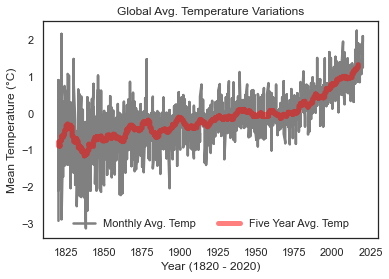

In [153]:
# Plot a line graph to understand temperature variations over 200 years globally

from pylab import *

plt.title('Global Avg. Temperature Variations')
plt.xlabel('Year (1820 - 2020)')
plt.ylabel('Mean Temperature (°C)')
plot(global_avg_temp_filter[['year']],global_avg_temp_filter[['monthly_variation']], color='grey', linewidth=2.5, 
     linestyle='-', label='Monthly Avg. Temp')
legend(frameon=False, loc='lower center', ncol=2)
plot(global_avg_temp_filter[['year']],global_avg_temp_filter[['five_year_variation']], color='red', linewidth=5, 
     alpha=0.5, linestyle='-', label='Five Year Avg. Temp')
legend(frameon=False, loc='lower center', ncol=2)

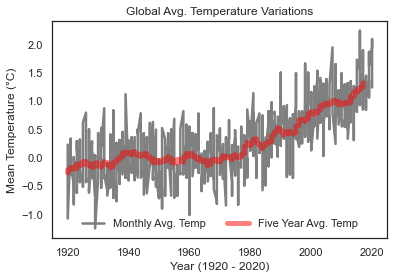

In [154]:
# Let's zoom in to understand the trend in the last century 

global_avg_temp_filter2 = global_avg_temp[global_avg_temp.year >= 1920]
plt.title('Global Avg. Temperature Variations')
plt.xlabel('Year (1920 - 2020)')
plt.ylabel('Mean Temperature (°C)')
plot(global_avg_temp_filter2[['year']],global_avg_temp_filter2[['monthly_variation']], color='grey', linewidth=2.5, linestyle='-', label='Monthly Avg. Temp')
legend(frameon=False, loc='lower center', ncol=2)
plot(global_avg_temp_filter2[['year']],global_avg_temp_filter2[['five_year_variation']], color='red', linewidth=5, alpha=0.5, linestyle='-', label='Five Year Avg. Temp')
legend(frameon=False, loc='lower center', ncol=2)

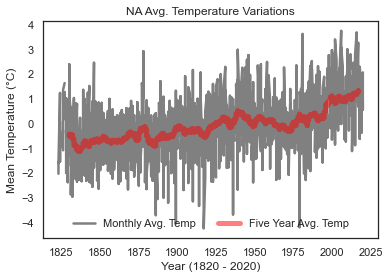

In [155]:
# Plot a line graph to understand temperature variations over 200 years in NA

NA_avg_temp_filter = NA_avg_temp[NA_avg_temp.year >= 1820]
plt.title('NA Avg. Temperature Variations')
plt.xlabel('Year (1820 - 2020)')
plt.ylabel('Mean Temperature (°C)')
plot(NA_avg_temp_filter[['year']],NA_avg_temp_filter[['monthly_variation']], color='grey', linewidth=2.5, linestyle='-', label='Monthly Avg. Temp')
legend(frameon=False, loc='lower center', ncol=2)
plot(NA_avg_temp_filter[['year']],NA_avg_temp_filter[['five_year_variation']], color='red', linewidth=5, alpha=0.5, linestyle='-', label='Five Year Avg. Temp')
legend(frameon=False, loc='lower center', ncol=2)

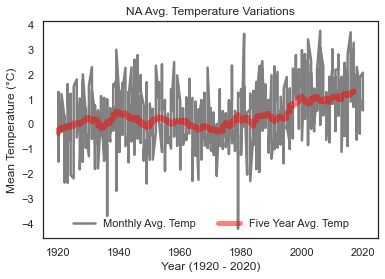

In [156]:
# Plot a line graph to understand temperature variations over 100 years in NA

NA_avg_temp_filter2 = NA_avg_temp[NA_avg_temp.year >= 1920]
plt.title('NA Avg. Temperature Variations')
plt.xlabel('Year (1920 - 2020)')
plt.ylabel('Mean Temperature (°C)')
plot(NA_avg_temp_filter2[['year']],NA_avg_temp_filter2[['monthly_variation']], color='grey', linewidth=2.5, linestyle='-', label='Monthly Avg. Temp')
legend(frameon=False, loc='lower center', ncol=2)
plot(NA_avg_temp_filter2[['year']],NA_avg_temp_filter2[['five_year_variation']], color='red', linewidth=5, alpha=0.5, linestyle='-', label='Five Year Avg. Temp')
legend(frameon=False, loc='lower center', ncol=2)

In [157]:
NA_avg_temp_filter['quintile'] = pd.qcut(NA_avg_temp_filter['year'], q=10)
NA_avg_temp_group = NA_avg_temp_filter.groupby(['quintile']).mean()[["monthly_variation","monthly_Uncertainity"]].reset_index()
NA_avg_temp_group

,quintile,monthly_variation,monthly_Uncertainity
0,"(1822.999, 1843.0]",-0.683749,1.641277
1,"(1843.0, 1863.0]",-0.711397,1.296983
2,"(1863.0, 1882.0]",-0.458605,0.975557
3,"(1882.0, 1902.0]",-0.513117,0.597629
4,"(1902.0, 1922.0]",-0.330092,0.432346
5,"(1922.0, 1941.0]",0.119123,0.281961
6,"(1941.0, 1961.0]",0.130967,0.198958
7,"(1961.0, 1981.0]",-0.015783,0.211325
8,"(1981.0, 2000.0]",0.354175,0.168382
9,"(2000.0, 2020.0]",1.061859,0.167060


In [158]:
NA_max_temp_filter = NA_max_temp[NA_max_temp.columns[0:3]]
top10_tmax =NA_max_temp_filter.sort_values(['month','monthly_variation'],ascending=[True,False]).groupby('month').head(10)
top10_tmax = top10_tmax.reset_index()
pivot_top10_tmax = top10_tmax.pivot(columns='month', values='year').reset_index()
tmax_year = pivot_top10_tmax.apply(lambda x: pd.Series(x.dropna().values)).head(10)
tmax_year['rank'] = tmax_year['index']+1
del tmax_year['index']
tmax_year.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','rank']
tmax_year

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,rank
0,2006.0,2017.0,2016.0,2010.0,1998.0,2016.0,2012.0,2012.0,2012.0,1963.0,2016.0,2002.0,1
1,1981.0,2000.0,2010.0,2006.0,2018.0,2012.0,1936.0,2011.0,1998.0,1947.0,1999.0,2006.0,2
2,2016.0,2016.0,1878.0,1998.0,2006.0,2013.0,2016.0,2010.0,2011.0,2003.0,2009.0,1939.0,3
3,2017.0,2012.0,2000.0,1915.0,2012.0,2006.0,2018.0,2003.0,2015.0,1938.0,1949.0,2015.0,4
4,2014.0,1954.0,1946.0,2012.0,2016.0,2015.0,1998.0,2016.0,2009.0,2010.0,1878.0,2001.0,5
5,2001.0,1991.0,1945.0,2005.0,2017.0,1900.0,2017.0,2001.0,2017.0,2017.0,1981.0,2011.0,6
6,2003.0,1977.0,2012.0,1977.0,1934.0,2002.0,2006.0,1998.0,2001.0,2014.0,2010.0,2018.0,7
7,2012.0,1999.0,1981.0,2016.0,2001.0,2017.0,2007.0,2013.0,1938.0,2015.0,2001.0,2003.0,8
8,1987.0,1998.0,1910.0,1895.0,1958.0,1994.0,2003.0,2017.0,2016.0,2016.0,2015.0,2017.0,9
9,1942.0,2005.0,1889.0,1987.0,2003.0,1988.0,2011.0,1878.0,1940.0,1931.0,1954.0,2005.0,10


In [159]:
NA_min_temp_filter = NA_min_temp[NA_min_temp.columns[0:3]]
top10_tmin =NA_min_temp_filter.sort_values(['month','monthly_variation'],ascending=[True,True]).groupby('month').head(10)
top10_tmin = top10_tmin.reset_index()
pivot_top10_tmin = top10_tmin.pivot(columns='month', values='year').reset_index()
tmin_year = pivot_top10_tmin.apply(lambda x: pd.Series(x.dropna().values)).head(10)
tmin_year['rank'] = tmin_year['index']+1
del tmin_year['index']
tmin_year.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','rank']
tmin_year

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,rank
0,1886.0,1979.0,1875.0,1907.0,1907.0,1917.0,1918.0,1890.0,1873.0,1917.0,1880.0,1917.0,1
1,1887.0,1899.0,1964.0,1909.0,1917.0,1915.0,1891.0,1917.0,1918.0,1873.0,1875.0,1871.0,2
2,1884.0,1936.0,1880.0,1874.0,1888.0,1907.0,1883.0,1887.0,1974.0,1887.0,1898.0,1879.0,3
3,1875.0,1910.0,1923.0,1880.0,1983.0,1875.0,1912.0,1883.0,1956.0,1895.0,1871.0,1872.0,4
4,1888.0,1914.0,1899.0,1928.0,1945.0,1877.0,1913.0,1880.0,1965.0,1891.0,1932.0,1880.0,5
5,1925.0,1887.0,1888.0,1887.0,1891.0,1902.0,1884.0,1950.0,1871.0,1884.0,1872.0,1887.0,6
6,1918.0,1891.0,1887.0,1920.0,1918.0,1916.0,1904.0,1884.0,1883.0,1898.0,1883.0,1916.0,7
7,1982.0,1894.0,1896.0,1893.0,1890.0,1945.0,1924.0,1927.0,1903.0,1925.0,1955.0,1933.0,8
8,1909.0,1904.0,1960.0,1918.0,1875.0,1918.0,1915.0,1879.0,1904.0,1876.0,1874.0,1924.0,9
9,1883.0,1884.0,1890.0,1972.0,1884.0,1929.0,1895.0,1907.0,1879.0,1893.0,1896.0,1983.0,10


## 2) Segmentation

In [180]:
# Import US - State dataset with TAVG, TMAX, TMIN, PRCP, SNOW variables for the segmentation

us_state_master_v1 = pd.read_csv(r'Data Processing\Dependent Variables\data_2010_2019.csv', sep=",", error_bad_lines = False)
us_state_master_v2 = pd.read_csv(r'Data Processing\Dependent Variables\data_2000_2009.csv', sep=",", error_bad_lines = False)
us_state_master = us_state_master_v1.append(us_state_master_v2, ignore_index=True)
us_state_master.head()

,State,date,metric_name,metric_value
0,AK,20200101,PRCP,59.407895
1,AK,20200101,SNOW,48.717949
2,AK,20200101,TAVG,-161.350319
3,AK,20200101,TMAX,-94.241935
4,AK,20200101,TMIN,-171.959677


In [181]:
us_state_master_pivot = pd.pivot_table(us_state_master, values ='metric_value', index =['State','date'], columns =['metric_name']) 

In [182]:
us_state_master_pivot.reset_index(inplace=True)
us_state_master_pivot['date'] = us_state_master_pivot['date'].astype(int)
us_state_master_pivot.head()

metric_name,State,date,PRCP,SNOW,TAVG,TMAX,TMIN
0,AK,20000101,3.772727,2.168142,-23.055556,-239.839779,-301.219780
1,AK,20000102,3.525974,2.743363,-274.610390,-235.976471,-301.725146
2,AK,20000103,16.163399,10.973214,24.976471,-211.955307,-275.744444
3,AK,20000104,18.701987,21.194690,19.840909,-197.032967,-263.373626
4,AK,20000105,17.359477,20.157895,38.241379,-183.978142,-258.961749


In [183]:
us_state_master_pivot['Year'] = us_state_master_pivot['date'].astype(str).str[0:4]
us_state_master_pivot_LT2010 = us_state_master_pivot[us_state_master_pivot.Year.isin(['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009'])]
us_state_master_pivot_LT2010.head() 

metric_name,State,date,PRCP,SNOW,TAVG,TMAX,TMIN,Year
0,AK,20000101,3.772727,2.168142,-23.055556,-239.839779,-301.219780,2000
1,AK,20000102,3.525974,2.743363,-274.610390,-235.976471,-301.725146,2000
2,AK,20000103,16.163399,10.973214,24.976471,-211.955307,-275.744444,2000
3,AK,20000104,18.701987,21.194690,19.840909,-197.032967,-263.373626,2000
4,AK,20000105,17.359477,20.157895,38.241379,-183.978142,-258.961749,2000


In [184]:
segmentation_LT2010 = us_state_master_pivot_LT2010.groupby('State').agg(
PRCP_AVG_old=('PRCP',np.mean),SNOW_AVG_old=('SNOW',np.mean),TAVG_AVG_old=('TAVG',np.mean),TMAX_AVG_old=('TMAX',np.mean),TMIN_AVG_old=('TMIN',np.mean),
PRCP_MAX_old=('PRCP',np.max),SNOW_MAX_old=('SNOW',np.max),TAVG_MAX_old=('TAVG',np.max),TMAX_MAX_old=('TMAX',np.max),TMIN_MAX_old=('TMIN',np.max),
PRCP_MIN_old=('PRCP',np.min),SNOW_MIN_old=('SNOW',np.min),TAVG_MIN_old=('TAVG',np.min),TMAX_MIN_old=('TMAX',np.min),TMIN_MIN_old=('TMIN',np.min),
PRCP_CNT_old=('PRCP',np.count_nonzero),SNOW_CNT_old=('SNOW',np.count_nonzero)).reset_index()

In [185]:
segmentation_LT2010['PRCP_CHG_old'] = segmentation_LT2010['PRCP_MAX_old'] - segmentation_LT2010['PRCP_MIN_old']
segmentation_LT2010['SNOW_CHG_old'] = segmentation_LT2010['SNOW_MAX_old'] - segmentation_LT2010['SNOW_MIN_old']
segmentation_LT2010['TMAX_CHG_old'] = segmentation_LT2010['TMAX_MAX_old'] - segmentation_LT2010['TMAX_MIN_old']
segmentation_LT2010['TMIN_CHG_old'] = segmentation_LT2010['TMIN_MAX_old'] - segmentation_LT2010['TMIN_MIN_old']
segmentation_LT2010['TAVG_CHG_old'] = segmentation_LT2010['TAVG_MAX_old'] - segmentation_LT2010['TAVG_MIN_old']

In [186]:
us_state_master_pivot_GT2010 = us_state_master_pivot[us_state_master_pivot.Year.isin(['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])]
segmentation_GT2010 = us_state_master_pivot_GT2010.groupby('State').agg(
PRCP_AVG=('PRCP',np.mean),SNOW_AVG=('SNOW',np.mean),TAVG_AVG=('TAVG',np.mean),TMAX_AVG=('TMAX',np.mean),TMIN_AVG=('TMIN',np.mean),
PRCP_MAX=('PRCP',np.max),SNOW_MAX=('SNOW',np.max),TAVG_MAX=('TAVG',np.max),TMAX_MAX=('TMAX',np.max),TMIN_MAX=('TMIN',np.max),
PRCP_MIN=('PRCP',np.min),SNOW_MIN=('SNOW',np.min),TAVG_MIN=('TAVG',np.min),TMAX_MIN=('TMAX',np.min),TMIN_MIN=('TMIN',np.min)    
,PRCP_CNT=('PRCP',np.count_nonzero),SNOW_CNT=('SNOW',np.count_nonzero)).reset_index()
#Dropping DC as it does not have sufficient data
i = segmentation_GT2010[((segmentation_GT2010.State == 'DC'))].index
segmentation_GT2010 = segmentation_GT2010.drop(i)

segmentation_GT2010['PRCP_CHG'] = segmentation_GT2010['PRCP_MAX'] - segmentation_GT2010['PRCP_MIN']
segmentation_GT2010['SNOW_CHG'] = segmentation_GT2010['SNOW_MAX'] - segmentation_GT2010['SNOW_MIN']
segmentation_GT2010['TMAX_CHG'] = segmentation_GT2010['TMAX_MAX'] - segmentation_GT2010['TMAX_MIN']
segmentation_GT2010['TMIN_CHG'] = segmentation_GT2010['TMIN_MAX'] - segmentation_GT2010['TMIN_MIN']
segmentation_GT2010['TAVG_CHG'] = segmentation_GT2010['TAVG_MAX'] - segmentation_GT2010['TAVG_MIN']


In [187]:
segmentation_merge = pd.merge(segmentation_LT2010, segmentation_GT2010[['State','PRCP_AVG','SNOW_AVG','TAVG_AVG','TMAX_AVG','TMIN_AVG','PRCP_MAX','SNOW_MAX','TAVG_MAX','TMAX_MAX','TMIN_MAX','PRCP_MIN','SNOW_MIN','TAVG_MIN','TMAX_MIN','TMIN_MIN','PRCP_CHG','SNOW_CHG','TMAX_CHG','TMIN_CHG','TAVG_CHG','PRCP_CNT','SNOW_CNT']], on="State", how="left")

In [188]:
segmentation_merge.head()

,State,PRCP_AVG_old,SNOW_AVG_old,TAVG_AVG_old,TMAX_AVG_old,TMIN_AVG_old,PRCP_MAX_old,SNOW_MAX_old,TAVG_MAX_old,TMAX_MAX_old,...,TAVG_MIN,TMAX_MIN,TMIN_MIN,PRCP_CHG,SNOW_CHG,TMAX_CHG,TMIN_CHG,TAVG_CHG,PRCP_CNT,SNOW_CNT
0,AK,27.871682,6.071717,2.198398,46.092208,-46.634831,201.355556,75.463636,366.025862,266.930041,...,-283.756098,-230.381147,-308.668050,230.011905,82.446429,498.350496,429.162258,487.543976,3650.0,2132.0
1,AL,39.202887,0.020449,173.833059,238.341732,110.614394,626.192982,12.629032,308.333333,387.617977,...,-76.000000,-18.464286,-128.144578,738.452830,127.197368,399.393698,370.722356,383.200000,3476.0,111.0
2,AR,36.159019,0.223889,157.440696,221.698684,100.974278,811.743056,144.796748,315.214286,407.945652,...,-131.800000,-52.033708,-153.865169,950.951219,119.000000,466.518244,418.763128,471.633333,3342.0,243.0
3,AZ,9.117759,0.600759,132.437733,235.173411,77.972011,347.283784,64.389313,565.253012,469.752577,...,-115.182927,-3.287958,-141.446700,353.865385,192.042253,396.858610,352.973530,393.496180,2979.0,674.0
4,CA,16.747755,0.976810,130.527012,212.021819,72.129637,416.300562,31.962329,290.009967,384.083026,...,-45.299625,44.462963,-75.177515,420.116788,112.098039,328.640696,278.039303,323.573007,3561.0,1015.0


In [189]:
segmentation_merge['PRCP_max_yoy'] = segmentation_merge['PRCP_MAX'] - segmentation_merge['PRCP_MAX_old']
segmentation_merge['SNOW_max_yoy'] = segmentation_merge['SNOW_MAX'] - segmentation_merge['SNOW_MAX_old']
segmentation_merge['TMAX_max_yoy'] = segmentation_merge['TMAX_MAX'] - segmentation_merge['TMAX_MAX_old']
segmentation_merge['TMIN_max_yoy'] = segmentation_merge['TMIN_MAX'] - segmentation_merge['TMIN_MAX_old']
segmentation_merge['TAVG_max_yoy'] = segmentation_merge['TAVG_MAX'] - segmentation_merge['TAVG_MAX_old']

segmentation_merge['TAVG_avg_yoy'] = segmentation_merge['TAVG_AVG'] - segmentation_merge['TAVG_AVG_old']
segmentation_merge['TMIN_avg_yoy'] = segmentation_merge['TMIN_AVG'] - segmentation_merge['TMIN_AVG_old']
segmentation_merge['TMAX_avg_yoy'] = segmentation_merge['TMAX_AVG'] - segmentation_merge['TMAX_AVG_old']


segmentation_merge['PRCP_min_yoy'] = segmentation_merge['PRCP_MIN'] - segmentation_merge['PRCP_MIN_old']
segmentation_merge['SNOW_min_yoy'] = segmentation_merge['SNOW_MIN'] - segmentation_merge['SNOW_MIN_old']
segmentation_merge['TMAX_min_yoy'] = segmentation_merge['TMAX_MIN'] - segmentation_merge['TMAX_MIN_old']
segmentation_merge['TMIN_min_yoy'] = segmentation_merge['TMIN_MIN'] - segmentation_merge['TMIN_MIN_old']
segmentation_merge['TAVG_min_yoy'] = segmentation_merge['TAVG_MIN'] - segmentation_merge['TAVG_MIN_old']

segmentation_merge['PRCP_CNT_yoy'] = segmentation_merge['PRCP_CNT'] - segmentation_merge['PRCP_CNT_old']
segmentation_merge['SNOW_CNT_yoy'] = segmentation_merge['SNOW_CNT'] - segmentation_merge['SNOW_CNT_old']

segmentation_merge['PRCP_CHG_yoy'] = segmentation_merge['PRCP_CHG'] - segmentation_merge['PRCP_CHG_old']
segmentation_merge['SNOW_CHG_yoy'] = segmentation_merge['SNOW_CHG'] - segmentation_merge['SNOW_CHG_old']
segmentation_merge['TMAX_CHG_yoy'] = segmentation_merge['TMAX_CHG'] - segmentation_merge['TMAX_CHG_old']
segmentation_merge['TMIN_CHG_yoy'] = segmentation_merge['TMIN_CHG'] - segmentation_merge['TMIN_CHG_old']
segmentation_merge['TAVG_CHG_yoy'] = segmentation_merge['TAVG_CHG'] - segmentation_merge['TAVG_CHG_old']

In [190]:
segmentation_merge.head()

,State,PRCP_AVG_old,SNOW_AVG_old,TAVG_AVG_old,TMAX_AVG_old,TMIN_AVG_old,PRCP_MAX_old,SNOW_MAX_old,TAVG_MAX_old,TMAX_MAX_old,...,TMAX_min_yoy,TMIN_min_yoy,TAVG_min_yoy,PRCP_CNT_yoy,SNOW_CNT_yoy,PRCP_CHG_yoy,SNOW_CHG_yoy,TMAX_CHG_yoy,TMIN_CHG_yoy,TAVG_CHG_yoy
0,AK,27.871682,6.071717,2.198398,46.092208,-46.634831,201.355556,75.463636,366.025862,266.930041,...,17.971125,-0.251383,16.895418,-2.0,-236.0,28.656349,6.982792,-16.931818,1.039469,-179.133401
1,AL,39.202887,0.020449,173.833059,238.341732,110.614394,626.192982,12.629032,308.333333,387.617977,...,-22.364286,-2.984084,-24.733333,127.0,43.0,112.259848,114.568336,15.675720,7.104031,23.600000
2,AR,36.159019,0.223889,157.440696,221.698684,100.974278,811.743056,144.796748,315.214286,407.945652,...,-23.374367,-30.400052,-51.800000,63.0,6.0,139.208164,-25.796748,29.913251,51.935374,76.419048
3,AZ,9.117759,0.600759,132.437733,235.173411,77.972011,347.283784,64.389313,565.253012,469.752577,...,-29.174556,-19.221059,-38.956260,-116.0,-41.0,6.581601,127.652941,-47.007369,-88.739673,-247.983499
4,CA,16.747755,0.976810,130.527012,212.021819,72.129637,416.300562,31.962329,290.009967,384.083026,...,2.842963,4.426537,-4.926744,92.0,-40.0,3.816227,80.135710,-13.822330,-17.855251,-6.809841


In [191]:
segmentation_merge = segmentation_merge.fillna(segmentation_merge.mean())
segmentation_merge_v2  = segmentation_merge.drop(columns =['State'])
segmentation_merge_v2.head()

,PRCP_AVG_old,SNOW_AVG_old,TAVG_AVG_old,TMAX_AVG_old,TMIN_AVG_old,PRCP_MAX_old,SNOW_MAX_old,TAVG_MAX_old,TMAX_MAX_old,TMIN_MAX_old,...,TMAX_min_yoy,TMIN_min_yoy,TAVG_min_yoy,PRCP_CNT_yoy,SNOW_CNT_yoy,PRCP_CHG_yoy,SNOW_CHG_yoy,TMAX_CHG_yoy,TMIN_CHG_yoy,TAVG_CHG_yoy
0,27.871682,6.071717,2.198398,46.092208,-46.634831,201.355556,75.463636,366.025862,266.930041,119.706122,...,17.971125,-0.251383,16.895418,-2.0,-236.0,28.656349,6.982792,-16.931818,1.039469,-179.133401
1,39.202887,0.020449,173.833059,238.341732,110.614394,626.192982,12.629032,308.333333,387.617977,238.457831,...,-22.364286,-2.984084,-24.733333,127.0,43.0,112.259848,114.568336,15.675720,7.104031,23.600000
2,36.159019,0.223889,157.440696,221.698684,100.974278,811.743056,144.796748,315.214286,407.945652,243.362637,...,-23.374367,-30.400052,-51.800000,63.0,6.0,139.208164,-25.796748,29.913251,51.935374,76.419048
3,9.117759,0.600759,132.437733,235.173411,77.972011,347.283784,64.389313,565.253012,469.752577,319.487562,...,-29.174556,-19.221059,-38.956260,-116.0,-41.0,6.581601,127.652941,-47.007369,-88.739673,-247.983499
4,16.747755,0.976810,130.527012,212.021819,72.129637,416.300562,31.962329,290.009967,384.083026,216.290503,...,2.842963,4.426537,-4.926744,92.0,-40.0,3.816227,80.135710,-13.822330,-17.855251,-6.809841


In [192]:
cols_of_interest = ['PRCP_MAX','SNOW_MAX','TAVG_avg_yoy','TMAX_max_yoy','TMAX_avg_yoy','TMIN_min_yoy']
data = segmentation_merge_v2[cols_of_interest]
data.head()

,PRCP_MAX,SNOW_MAX,TAVG_avg_yoy,TMAX_max_yoy,TMAX_avg_yoy,TMIN_min_yoy
0,230.011905,82.446429,-8.812444,1.039307,-0.455358,-0.251383
1,738.452830,127.197368,3.824617,-6.688566,2.657868,-2.984084
2,950.951219,119.000000,-1.701276,6.538884,1.238232,-30.400052
3,353.865385,192.042253,-7.557241,-76.181925,-7.145350,-19.221059
4,420.116788,112.098039,-0.246755,-10.979367,0.622338,4.426537


In [193]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
X = StandardScaler().fit_transform(data)

In [194]:
#Set number of clusters at initialisation time
k_means = KMeans(n_clusters=4, max_iter = 1000, random_state=4242)
#Run the clustering algorithm
model = k_means.fit(X)
model
#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(X)

In [195]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

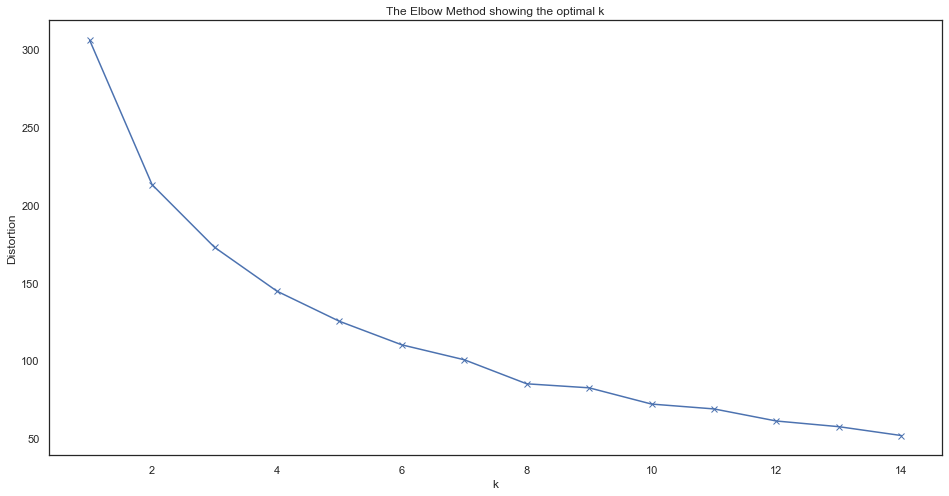

In [196]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [197]:
segmentation_merge['Cluster'] = pd.Series(y_hat)

In [198]:
segmentation_merge

,State,PRCP_AVG_old,SNOW_AVG_old,TAVG_AVG_old,TMAX_AVG_old,TMIN_AVG_old,PRCP_MAX_old,SNOW_MAX_old,TAVG_MAX_old,TMAX_MAX_old,...,TMIN_min_yoy,TAVG_min_yoy,PRCP_CNT_yoy,SNOW_CNT_yoy,PRCP_CHG_yoy,SNOW_CHG_yoy,TMAX_CHG_yoy,TMIN_CHG_yoy,TAVG_CHG_yoy,Cluster
0,AK,27.871682,6.071717,2.198398,46.092208,-46.634831,201.355556,75.463636,366.025862,266.930041,...,-0.251383,16.895418,-2.00,-236.0,28.656349,6.982792,-16.931818,1.039469,-179.133401,0
1,AL,39.202887,0.020449,173.833059,238.341732,110.614394,626.192982,12.629032,308.333333,387.617977,...,-2.984084,-24.733333,127.00,43.0,112.259848,114.568336,15.675720,7.104031,23.600000,2
2,AR,36.159019,0.223889,157.440696,221.698684,100.974278,811.743056,144.796748,315.214286,407.945652,...,-30.400052,-51.800000,63.00,6.0,139.208164,-25.796748,29.913251,51.935374,76.419048,2
3,AZ,9.117759,0.600759,132.437733,235.173411,77.972011,347.283784,64.389313,565.253012,469.752577,...,-19.221059,-38.956260,-116.00,-41.0,6.581601,127.652941,-47.007369,-88.739673,-247.983499,1
4,CA,16.747755,0.976810,130.527012,212.021819,72.129637,416.300562,31.962329,290.009967,384.083026,...,4.426537,-4.926744,92.00,-40.0,3.816227,80.135710,-13.822330,-17.855251,-6.809841,0
5,CO,13.317385,4.281294,47.410052,145.456092,-6.199542,314.379791,312.505110,325.612903,409.958333,...,-43.439487,-41.935485,-13.00,-72.0,4.106894,-112.946827,-39.552137,26.053963,24.310818,1
6,CT,36.183093,3.115642,100.283554,151.115233,40.325585,798.470588,235.333333,300.000000,355.833333,...,-27.576923,-14.315347,27.00,1.0,337.529412,399.140351,-6.046795,30.450226,-19.505492,3
7,DC,39.098063,0.895568,110.583957,175.478670,52.735224,1476.000000,170.000000,321.893276,370.051121,...,-16.343646,-14.315347,48.66,-31.0,121.237794,39.585851,9.443067,10.256164,-19.505492,2
8,DE,33.591835,1.021878,136.178476,188.325422,84.823227,1027.000000,321.500000,600.000000,365.600000,...,-45.200000,-31.000000,597.00,132.0,658.300000,70.264706,50.900000,49.266667,-241.000000,3
9,FL,37.215554,0.031174,219.433312,277.746410,167.530072,536.940476,4.272727,302.357143,356.435897,...,-8.722756,-21.142857,49.00,-32.0,923.104468,-3.939394,38.333402,5.891597,15.554945,2


In [199]:
segmentation_merge_summary = segmentation_merge.groupby('Cluster').mean()
segmentation_merge.groupby('Cluster').count()

,State,PRCP_AVG_old,SNOW_AVG_old,TAVG_AVG_old,TMAX_AVG_old,TMIN_AVG_old,PRCP_MAX_old,SNOW_MAX_old,TAVG_MAX_old,TMAX_MAX_old,...,TMAX_min_yoy,TMIN_min_yoy,TAVG_min_yoy,PRCP_CNT_yoy,SNOW_CNT_yoy,PRCP_CHG_yoy,SNOW_CHG_yoy,TMAX_CHG_yoy,TMIN_CHG_yoy,TAVG_CHG_yoy
Cluster,,,,,,,,,,,,,,,,,,,,,
0,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
3,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


In [232]:
segmentation_merge.to_csv(r'Data Analysis\Segmentation data\revised_cluster_results_final_v2.csv') 
segmentation_merge_summary.to_csv(r'Data Analysis\Segmentation data\revised_summary_results_final_v2.csv') 

## 3) Statistical Model

In [200]:
# Mapping file for State & Abbreviations
us_state_mapping = pd.read_csv(r"Data Processing\Analysis Mapping Files\state mapping file.csv", sep=",", error_bad_lines = False)
us_state_mapping.head()

,State,stateabbr
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [211]:
# Dependent variable data

us_state_master_v1 = pd.read_csv(r"Data Processing\Dependent Variables\data_2010_2019.csv", sep=",", error_bad_lines = False)
us_state_master_v2 = pd.read_csv(r"Data Processing\Dependent Variables\data_2000_2009.csv", sep=",", error_bad_lines = False)
us_state_master_v3 = pd.read_csv(r"Data Processing\Dependent Variables\data_1990_1999.csv", sep=",", error_bad_lines = False)
us_state_master = us_state_master_v1.append(us_state_master_v2, ignore_index=True)
us_state_master = us_state_master.append(us_state_master_v3, ignore_index=True)
us_state_master

,State,date,metric_name,metric_value
0,AK,20190101,PRCP,106.056604
1,AK,20190101,SNOW,11.253165
2,AK,20190101,TAVG,-34.836364
3,AK,20190101,TMAX,0.720930
4,AK,20190101,TMIN,-58.455253
...,...,...,...,...
2630290,WY,19991231,PRCP,1.807487
2630291,WY,19991231,SNOW,0.000000
2630292,WY,19991231,TAVG,-41.148936
2630293,WY,19991231,TMAX,32.336898


In [212]:
us_state_master_pivot = pd.pivot_table(us_state_master, values ='metric_value', index =['State','date'], columns =['metric_name']) 
us_state_master_pivot.reset_index(inplace=True)
us_state_master_pivot['date'] = us_state_master_pivot['date'].astype(int)
us_state_master_pivot['Year'] = us_state_master_pivot['date'].astype(str).str[0:4]
us_state_master_yearly = us_state_master_pivot.groupby(['Year','State']).agg(
PRCP_AVG=('PRCP',np.mean),SNOW_AVG=('SNOW',np.mean),TAVG_AVG=('TAVG',np.mean),TMAX_AVG=('TMAX',np.mean),TMIN_AVG=('TMIN',np.mean)).reset_index()

In [213]:
dependent_variable = us_state_master_yearly[['Year','State','TMAX_AVG']]

In [214]:
#Creating Master dataset to run regression model
master_dataset = pd.merge(dependent_variable, independent_variables, on=['State','Year'], how="left")
# Remove years that do not have data for the independent variables
master_dataset = master_dataset[~master_dataset.Year.isin(['2018','2019','2020'])]
master_dataset = master_dataset[~master_dataset.State.isin(['DC'])]

In [215]:
#To identify the number of missing values in the master dataset
master_dataset.isna().sum()

Year                        0
State                       0
TMAX_AVG                    0
Population                  0
meat_consumption            0
co2_emission                0
petroleum_emission          0
natural_gas_emission        0
electricity_emission        0
coal_emission               0
coal_consumption           43
natural_gas_consumption    23
petroleum_consumption       0
dtype: int64

In [216]:
master_dataset['coal_consumption'] = master_dataset['coal_consumption'].fillna(0)
master_dataset['natural_gas_consumption'] = master_dataset['natural_gas_consumption'].fillna(0)

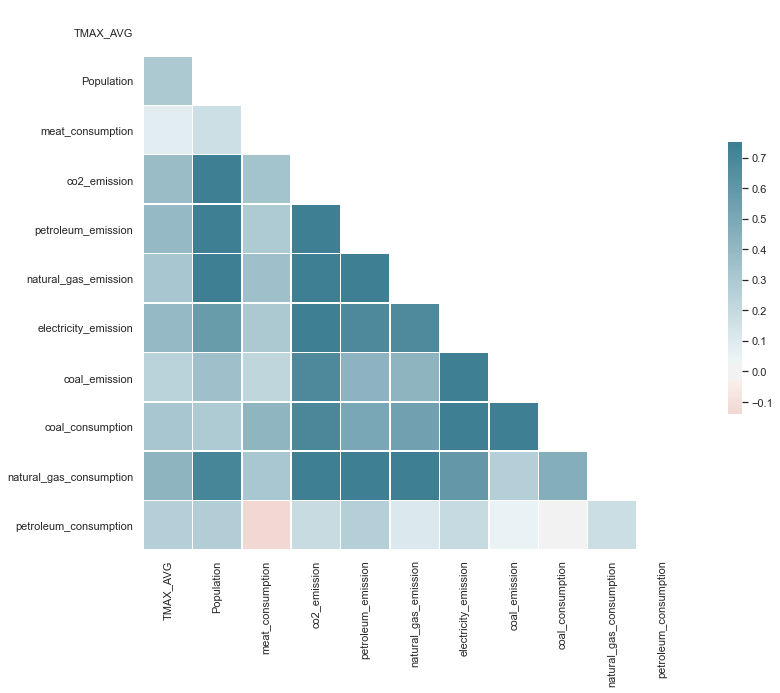

In [217]:
# Correlation Matrix


from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")



# Compute the correlation matrix
corr = master_dataset.corr(method = 'pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [218]:
# Mapping file for State & Abbreviations
cluster_state_mapping = pd.read_csv(r"Data Processing\Analysis Mapping Files\state_cluster_mapping.csv", sep=",", error_bad_lines = False)
cluster_state_mapping.head()

,State,Cluster
0,AK,1
1,AL,3
2,AR,3
3,AZ,2
4,CA,1


In [219]:
master_dataset = pd.merge(master_dataset, cluster_state_mapping, on="State", how="left")
master_dataset.sort_values(['Cluster','State','Year'],ascending=[True,True,True])

,Year,State,TMAX_AVG,Population,meat_consumption,co2_emission,petroleum_emission,natural_gas_emission,electricity_emission,coal_emission,coal_consumption,natural_gas_consumption,petroleum_consumption,Cluster
6,1990,CT,165.060235,3289056.0,16522.0,40.6,31.3,5.8,11.4,3.7,9.700013e+05,4.480472e+06,5.806262e+06,0
56,1991,CT,165.895030,3288640.0,14816.0,39.8,30.1,6.1,10.9,3.7,9.719373e+05,4.514600e+06,4.422885e+06,0
106,1992,CT,142.085537,3274997.0,16656.0,40.2,29.8,6.7,8.8,3.7,9.777080e+05,4.961252e+06,3.043483e+06,0
156,1993,CT,149.731636,3272325.0,17912.0,38.1,28.0,6.7,7.6,3.5,9.343833e+05,3.671625e+06,2.456309e+06,0
206,1994,CT,151.252222,3268346.0,13686.0,37.4,26.7,7.1,7.4,3.7,9.635093e+05,5.936188e+06,2.003182e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,2013,WV,166.623888,1853914.0,204873.0,94.1,12.9,8.1,69.5,73.6,1.201767e+07,1.135139e+06,1.799287e+05,3
1248,2014,WV,164.912440,1849489.0,252463.0,99.8,12.9,9.5,74.2,77.9,1.276739e+07,2.683797e+06,1.892867e+05,3
1298,2015,WV,177.459365,1842050.0,211460.0,91.9,12.5,10.1,66.8,69.8,1.127241e+07,5.287599e+06,1.647680e+05,3
1348,2016,WV,184.074343,1831023.0,170475.0,94.4,13.2,9.9,69.6,71.8,1.177460e+07,4.448756e+06,1.438907e+05,3


In [220]:
# Basic Linear Regression Model to give some idea on the obviously important independent variables.

## Train regression model
## Step 1 : add constant to the equation - array of ones
X_array = sm.add_constant(master_dataset[['Population','co2_emission',
                                          'natural_gas_emission','coal_emission','coal_consumption','natural_gas_consumption','petroleum_consumption']])
Y = master_dataset['TMAX_AVG']
## Step 2 : build model

est = sm.OLS(Y,X_array)

## Step 3 : fit
est2 = est.fit()
print(est2.summary())
# Durbin Watson metrics has to be in between 1.4 and 2.6l



                            OLS Regression Results                            
Dep. Variable:               TMAX_AVG   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     98.59
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          4.78e-117
Time:                        00:17:07   Log-Likelihood:                -7140.8
No. Observations:                1400   AIC:                         1.430e+04
Df Residuals:                    1392   BIC:                         1.434e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [221]:
## Log transforming all the variables 

# First make a copy so that actual dataset is not altered
master_dataset_log = master_dataset.copy()

# Taking log transform
for c in [c for c in master_dataset_log.columns if np.issubdtype(master_dataset_log[c].dtype , np.number)]:
    master_dataset_log[c] = np.log(master_dataset_log[c]+1)
    
master_dataset_log = master_dataset_log.add_suffix('_log')

In [222]:
master_dataset_log = pd.merge(master_dataset_log, cluster_state_mapping,left_on='State_log',right_on='State', how="left")
master_dataset_cluster0 = master_dataset_log[master_dataset_log.Cluster == 0]
master_dataset_cluster1 = master_dataset_log[master_dataset_log.Cluster == 1]
master_dataset_cluster2 = master_dataset_log[master_dataset_log.Cluster == 2]
master_dataset_cluster3 = master_dataset_log[master_dataset_log.Cluster == 3]

In [223]:
# Log -Log Regression Model 

## Train regression model
## Step 1 : add constant to the equation - array of ones
X_array = sm.add_constant(master_dataset_log[['Population_log','co2_emission_log','petroleum_emission_log',
                                          'natural_gas_emission_log','coal_emission_log','meat_consumption_log','natural_gas_consumption_log','coal_consumption_log','electricity_emission_log','petroleum_consumption_log']])
Y = master_dataset_log['TMAX_AVG_log']
## Step 2 : build model
### Remove first row as it looks a bit off

est = sm.OLS(Y,X_array)

## Step 3 : fit
est2 = est.fit()
print(est2.summary())
# Durbin Watson metrics haas to be in between 1.4 and 2.6l

                            OLS Regression Results                            
Dep. Variable:           TMAX_AVG_log   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     155.3
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          3.20e-218
Time:                        00:17:12   Log-Likelihood:                 160.67
No. Observations:                1400   AIC:                            -299.3
Df Residuals:                    1389   BIC:                            -241.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [224]:
def GroupRegress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    print(result.summary())


master_dataset_log.groupby('Cluster').apply(GroupRegress, 'TMAX_AVG_log', ['Population_log','co2_emission_log','petroleum_emission_log',
                                          'natural_gas_emission_log','coal_emission_log','meat_consumption_log','natural_gas_consumption_log','coal_consumption_log','electricity_emission_log','petroleum_consumption_log'])

                            OLS Regression Results                            
Dep. Variable:           TMAX_AVG_log   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     47.84
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           5.11e-54
Time:                        00:17:13   Log-Likelihood:                 256.82
No. Observations:                 280   AIC:                            -491.6
Df Residuals:                     269   BIC:                            -451.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Population_log    

""


In [225]:
# Cluster 0 Log -Log Regression Model 

## Train regression model
## Step 1 : add constant to the equation - array of ones
X_array0 = sm.add_constant(master_dataset_cluster0[['Population_log','co2_emission_log','petroleum_emission_log',
                                          'meat_consumption_log','natural_gas_consumption_log','petroleum_consumption_log']])
Y0 = master_dataset_cluster0['TMAX_AVG_log']
## Step 2 : build model
### Remove first row as it looks a bit off

est = sm.OLS(Y0,X_array0)

## Step 3 : fit
est0 = est.fit()
print(est0.summary())
# Durbin Watson metrics haas to be in between 1.4 and 2.6l

                            OLS Regression Results                            
Dep. Variable:           TMAX_AVG_log   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     78.02
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           2.41e-56
Time:                        00:17:13   Log-Likelihood:                 253.57
No. Observations:                 280   AIC:                            -493.1
Df Residuals:                     273   BIC:                            -467.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [226]:
# Cluster 1 Log -Log Regression Model 

## Train regression model
## Step 1 : add constant to the equation - array of ones
X_array1 = sm.add_constant(master_dataset_cluster1[['Population_log','co2_emission_log','petroleum_emission_log',
                                          'natural_gas_emission_log','coal_emission_log','meat_consumption_log','natural_gas_consumption_log','coal_consumption_log','electricity_emission_log','petroleum_consumption_log']])
Y1 = master_dataset_cluster1['TMAX_AVG_log']
## Step 2 : build model
### Remove first row as it looks a bit off

est = sm.OLS(Y1,X_array1)

## Step 3 : fit
est1 = est.fit()
print(est1.summary())
# Durbin Watson metrics haas to be in between 1.4 and 2.6lb

                            OLS Regression Results                            
Dep. Variable:           TMAX_AVG_log   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     179.9
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          1.32e-137
Time:                        00:17:14   Log-Likelihood:                 195.65
No. Observations:                 392   AIC:                            -369.3
Df Residuals:                     381   BIC:                            -325.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [227]:
# Cluster 2 Log -Log Regression Model 

## Train regression model
## Step 1 : add constant to the equation - array of ones
X_array2 = sm.add_constant(master_dataset_cluster2[['Population_log','co2_emission_log',
                                          'natural_gas_emission_log','coal_emission_log','meat_consumption_log','natural_gas_consumption_log','electricity_emission_log']])
Y2 = master_dataset_cluster2['TMAX_AVG_log']
## Step 2 : build model
### Remove first row as it looks a bit off

est = sm.OLS(Y2,X_array2)

## Step 3 : fit
est2 = est.fit()
print(est2.summary())
# Durbin Watson metrics haas to be in between 1.4 and 2.6l

                            OLS Regression Results                            
Dep. Variable:           TMAX_AVG_log   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     363.1
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           1.08e-55
Time:                        00:17:15   Log-Likelihood:                 159.59
No. Observations:                  84   AIC:                            -303.2
Df Residuals:                      76   BIC:                            -283.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [228]:
# Cluster 3 Log -Log Regression Model 

## Train regression model
## Step 1 : add constant to the equation - array of ones
X_array3 = sm.add_constant(master_dataset_cluster3[['Population_log','petroleum_emission_log',
                                          'natural_gas_emission_log','coal_emission_log','meat_consumption_log','natural_gas_consumption_log','coal_consumption_log','electricity_emission_log']])
Y3 = master_dataset_cluster3['TMAX_AVG_log']
## Step 2 : build model
### Remove first row as it looks a bit off

est = sm.OLS(Y3,X_array3)

## Step 3 : fit
est3 = est.fit()
print(est3.summary())
# Durbin Watson metrics haas to be in between 1.4 and 2.6l

                            OLS Regression Results                            
Dep. Variable:           TMAX_AVG_log   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     156.9
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          6.59e-145
Time:                        00:17:15   Log-Likelihood:                 463.45
No. Observations:                 644   AIC:                            -908.9
Df Residuals:                     635   BIC:                            -868.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [229]:
est3.params


const                          4.429340
Population_log                -0.075077
petroleum_emission_log         0.234596
natural_gas_emission_log      -0.224848
coal_emission_log             -0.457239
meat_consumption_log          -0.029448
natural_gas_consumption_log    0.042071
coal_consumption_log           0.107737
electricity_emission_log       0.398118
dtype: float64

In [230]:
master_dataset_cluster3.mean()

Year_log                             inf
TMAX_AVG_log                    5.317970
Population_log                 15.499284
meat_consumption_log           13.508657
co2_emission_log                4.835821
petroleum_emission_log          3.859904
natural_gas_emission_log        3.087339
electricity_emission_log        3.997113
coal_emission_log               3.871493
coal_consumption_log           16.188359
natural_gas_consumption_log    16.009214
petroleum_consumption_log      12.889528
Cluster_log                     1.386294
Cluster                         3.000000
dtype: float64

In [231]:
master_dataset_cluster3

,Year_log,State_log,TMAX_AVG_log,Population_log,meat_consumption_log,co2_emission_log,petroleum_emission_log,natural_gas_emission_log,electricity_emission_log,coal_emission_log,coal_consumption_log,natural_gas_consumption_log,petroleum_consumption_log,Cluster_log,State,Cluster
1,1990,AL,5.535374,15.213859,13.386065,4.706824,3.493473,2.660260,3.958907,4.186620,16.224362,15.464341,12.023257,1.386294,AL,3
2,1990,AR,5.454747,14.671773,13.443837,3.947390,2.960105,2.595255,3.113515,3.054001,15.883587,16.990358,11.345098,1.386294,AR,3
8,1990,FL,5.685853,16.381872,12.910036,5.240688,4.709530,2.944439,4.484132,4.115780,16.319351,18.200414,16.440226,1.386294,FL,3
9,1990,GA,5.548007,15.688317,13.103655,4.940213,4.014580,2.884801,4.155753,4.232656,16.750388,14.936167,12.920583,1.386294,GA,3
10,1990,HI,5.572667,13.922304,10.490941,3.117950,3.109061,0.095310,2.151762,0.095310,7.202661,0.000000,15.673885,1.386294,HI,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,2017,TN,5.371351,15.718931,13.397574,4.591071,3.908015,2.917771,3.502550,3.493473,15.780828,17.262113,11.483631,1.386294,TN,3
1392,2017,TX,5.580401,17.158205,16.023285,6.561738,5.891092,5.358942,5.363168,4.939497,17.947874,19.991693,11.884956,1.386294,TX,3
1394,2017,VA,5.302570,15.951284,13.152336,4.594109,3.964615,3.484312,3.384390,2.785011,14.349582,18.475511,12.629224,1.386294,VA,3
1397,2017,WI,4.868037,15.571675,14.492913,4.591071,3.566712,3.321432,3.740048,3.640214,16.170204,17.369837,11.561643,1.386294,WI,3
